In [2]:
import numpy as np
import scipy.constants as c
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
plt.style.use("seaborn-v0_8-poster")
# plt.style.use("fast")
# plt.style.use("dark_background")
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

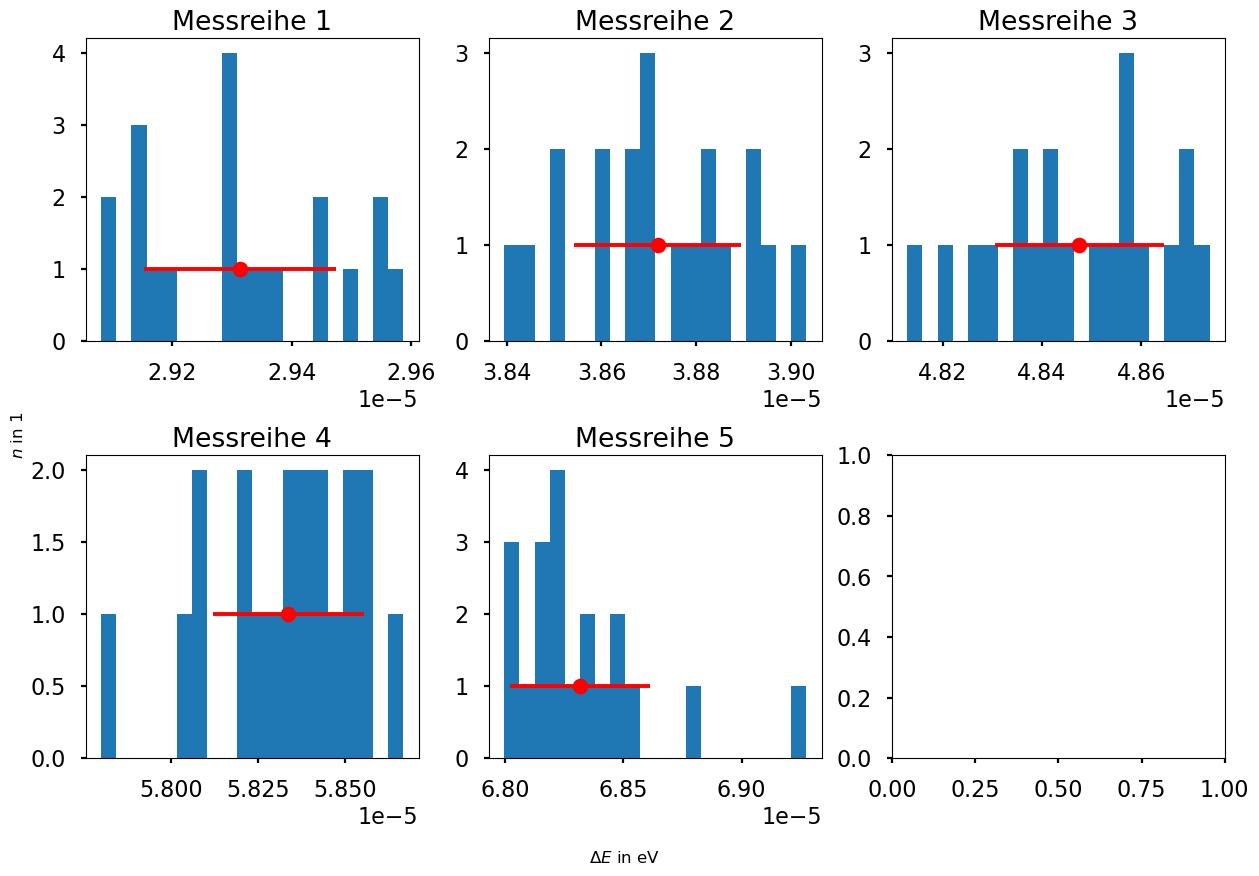

In [3]:
df = pd.read_csv("dataLines.csv")
eta = np.array(df).T * 1e2 # in $\ufrac 1m$


# $E = h f = \frac{hc}{\lambda} = h c \bar \eta$
E = c.h * c.c * eta / c.e # in $\u{eV}$


E_mean = E.mean(axis=1)
E_std = E.std(axis=1, ddof=1)

fig, axes = plt.subplots(2,3,)
for n,ax in enumerate(axes.flatten()[:-1]):
    ax.set_title(f"Messreihe {n+1}")
    ax.hist(E[n], bins=20)
    ax.errorbar(E_mean[n], 1,xerr=E_std[n], c="r", fmt="o")

fig.supxlabel(r"$\Delta E$ in eV")
fig.supylabel(r"$n$ in 1")
fig.tight_layout()
fig.savefig("1.svg")

# # $\Delta = A*(f+1)$

In [4]:
X = np.arange(2,7)
fit, cov = curve_fit(lambda x,a,b: a*x+b, X, E_mean, sigma=E_std)
f = lambda x: fit[0] * x + fit[1]

print(f"A = {fit[0]:.3} +/- {np.sqrt(cov[0,0]):.3} eV")
print(f"b = {fit[1]:.3} +/- {np.sqrt(cov[1,1]):.3} eV")

fit, cov = curve_fit(lambda x,a: a*x+a, X, E_mean, sigma=E_std)
f = lambda x: fit[0] * x + fit[0]

print(f"A = {fit[0]:.5} +/- {np.sqrt(cov[0,0]):.3} eV")

A = 9.72e-06 +/- 6.87e-08 eV
b = 9.72e-06 +/- 2.57e-07 eV
A = 9.7198e-06 +/- 1.61e-08 eV


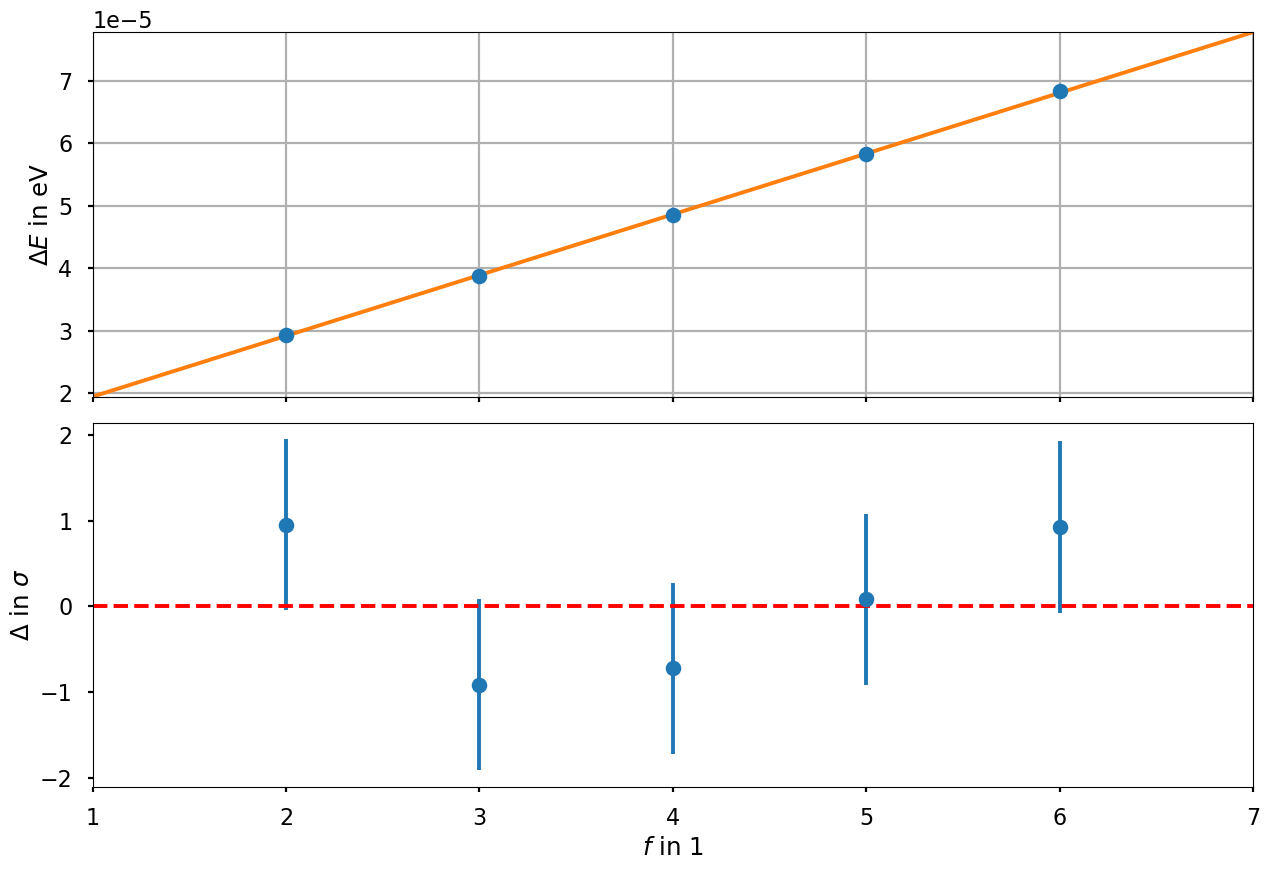

In [9]:
fig, [ax1,ax2] = plt.subplots(2,1,sharex=True)

X_ = np.arange(1,8)
Y_ = f(X_)
ax1.errorbar(X, E_mean, E_std, fmt="o")
ax1.plot(X_,Y_)
ax1.set_xlim(X_[0], X_[-1])
ax1.set_ylim(min(Y_),max(Y_)) 
ax1.set_ylabel(r"$\Delta E$ in eV")
ax1.grid()

res = (E_mean - f(X)) / E_std
ax2.errorbar(X, res, np.ones_like(X), fmt="o")
ax2.axhline(0, ls="--",c="r")
ax2.set_ylabel(r"$\Delta$ in $\sigma$")
ax2.set_xlabel("$f$ in 1")

plt.tight_layout()
plt.savefig("2.svg")
plt.show()